In [18]:
import networkx as nx
#importlib.import_module("hierarchy_pos.py")
from hierarchy_pos import hierarchy_pos
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import os
import random

In [2]:
L = 2
color_iterator = itertools.cycle(sns.color_palette())

In [76]:
random.seed(0)

In [30]:
zones = pd.read_csv("Zones_markers.csv",sep = "\t")
zones

,Z-1,Z-2,Z-3,Z-4,Z-5
0,Olfr792,Olfr790,Olfr449,Olfr2,Olfr1507
1,Olfr878,Olfr39,Olfr374,Olfr140,Olfr1277
2,Olfr1174-ps,Olfr855,Olfr214,Olfr1310,Olfr286
3,Olfr1019,Olfr1395,Olfr1239,Olfr1262,NaN
4,Olfr399,Olfr849,Olfr796,Olfr725,NaN
5,Olfr77,Olfr851,Olfr1353,Olfr167,NaN
6,Olfr1496,Olfr1225,Olfr211,Olfr1261,NaN
7,Olfr371,Olfr1269,Olfr1223,Olfr1323,NaN
8,Olfr24,Olfr1325,Olfr1415,Olfr1309,NaN
9,Olfr821,Olfr1217,Olfr398,Olfr31,NaN


In [194]:
#df_hier = pd.read_csv("hsbm_DV_svg/Olfr_03_05/labeled_membership_topics.csv", index_col = [1])
df_hier = pd.read_csv("hsbm_NewDataset/3D_", index_col = [1])
df_hier = df_hier.iloc[:,1:]
#df_hier.columns = ["l1","l2"]
#random model
#df_hier.index = random.sample(list(df_hier.index),len(df_hier.index))
df_hier

,l1,l2
gene,,
Olfr1,0,0
Olfr1000,1,1
Olfr1006,2,1
Olfr1009,3,2
Olfr101,2,1
...,...,...
Olfr987,17,2
Olfr988,7,2
Olfr99,4,1


In [19]:
momb = {}
mombaerts = pd.read_csv('Mombaerts_zones.csv',index_col = [0])
for i in range(len(mombaerts.columns)):
    for gene in mombaerts.iloc[:,i][~pd.isnull(mombaerts.iloc[:,i])]:
        #print(gene)
        momb[gene] = i
mombaert_zone = pd.DataFrame.from_dict(momb, orient = "index")

Olfr160
Olfr16
Olfr19
Olfr77
Olfr749
Olfr1496
Olfr24
Olfr429
Olfr821
Olfr849
Olfr1104
Olfr17
Olfr713
Olfr714
Olfr530
Olfr855
Olfr1395
Olfr1440
Olfr155
Olfr156
Olfr157
Olfr267
Olfr272
Olfr273
Olfr49
Olfr71
Olfr457
Olfr374
Olfr211
Olfr398
Olfr466
Olfr449
Olfr531
Olfr1239
Olfr1324
Olfr1353
Olfr1349
Olfr1412
Olfr2
Olfr6
Olfr124
Olfr167
Olfr286
Olfr322
Olfr533
Olfr536
Olfr1211
Olfr1213
Olfr1310
Olfr1415
Olfr1507
Olfr288
Olfr286
Olfr1228
Olfr1256
Olfr1508
Olfr1509
Olfr15
Olfr370


In [142]:
index_zone = []#["Uknown"]*len(df_hier.index)
markers = []
c = 0
for item in lda.index:
    if item in mombaert_zone.index: 
    #for i in range(len(mombaert_zone.columns)):
     #   if len(np.where(mombaert_zone.iloc[:,i] == item)[0]) != 0:
      #      print(item)
           # index_zone.append(i + 1)
        markers.append(item)
            
    

In [146]:
mombaert_zone = mombaert_zone.loc[markers,:]
lda = lda.loc[markers,:]

In [130]:
gene = pd.DataFrame.from_dict(genes, orient = "index")

In [71]:
import sklearn
from sklearn import cluster
#df_hier = pd.read_csv("hsbm_NewDataset/LDA_1D/DV/Countclust_topic-dist.csv", index_col = [0])
#df = pd.read_csv("Myra_dataset/RPMnorm_avgALignedReplicates/New_Olfr_DV_hvg_fitted_truncated.csv", index_col = [0])
#a = np.argmax(df_hier.to_numpy(),axis = 1)
#clustering = cluster.KMeans(5).fit_predict(df.T.to_numpy())
#clustering = sklearn.cluster.AgglomerativeClustering(8).fit_predict(lda)
#clustering

In [133]:
lda = pd.read_csv("hsbm_NewDataset/LDA/Countclust_logcounts/compare_hsbm/P_topics_gene.csv",index_col = [0])
lda

,1,2,3,4,5,6,7,8
Olfr1,0.168092,0.058041,0.377701,0.333400,0.053593,0.007144,0.000006,0.002024
Olfr1000,0.848089,0.000083,0.041398,0.083752,0.022811,0.000008,0.000009,0.003849
Olfr1006,0.764258,0.095892,0.139788,0.000019,0.000013,0.000009,0.000005,0.000016
Olfr1009,0.258900,0.660840,0.026336,0.051604,0.000013,0.000024,0.000006,0.002277
Olfr101,0.845591,0.130172,0.017038,0.007142,0.000017,0.000034,0.000003,0.000004
...,...,...,...,...,...,...,...,...
Olfr987,0.393687,0.465111,0.140601,0.000042,0.000009,0.000008,0.000009,0.000532
Olfr988,0.453684,0.493615,0.031520,0.020561,0.000018,0.000568,0.000005,0.000030
Olfr99,0.831974,0.030768,0.119749,0.010120,0.004763,0.000007,0.000003,0.002616
Olfr992,0.584215,0.283672,0.066502,0.054045,0.000619,0.010928,0.000006,0.000013


In [273]:
index_zone = []#["Uknown"]*len(df_hier.index)
markers = []

for item in df.T.index:
     
    for i in range(len(zones.columns)):
        if len(np.where(zones.iloc[:,i] == item)[0]) != 0:
            index_zone.append(i + 1)
            #markers.append(item)
            markers.append(np.where(df.T.index.values == item)[0][0])
#index_zone

In [351]:
#markers_ors = df_hier.index[markers] 
clusters = pd.read_csv("hsbm_2D_DEGS/27_04/not_scaled/topsbm_level_2_clusters.csv")
for group in clusters.columns:
    #print(len(clusters.iloc[:,i].values[50]))
#topic = []
#a = np.where(df_hier["l2"] == (3))
#topic.append(df_hier["gene"].values[a])
    c = list(clusters[group][clusters[group].notnull()].values)
    #print(df_hier["gene"].values[a])
    with open('hsbm_2D_DEGS/27_04/not_scaled/l2_gene_%s.txt' %(group), 'w') as f:
           for item in c:
                f.writelines(item + '\n')


In [265]:
#per vedere distribuzione dei soli markers


#markers.append(list(range(50)))
df_hier = df_hier.loc[markers,:]
df_hier["zone"] = index_zone
#df_hier.head()
#markers

In [150]:
metrics.v_measure_score(mombaert_zone.values.reshape(56,), clustering)

0.6728735736780992

In [132]:
metrics.v_measure_score(index_zone, gene.loc[markers,:].values.reshape(68,))

0.5093216181603194

In [193]:
metrics.v_measure_score(df_hier.zone,df_hier.l1)

0.2839395478601162

In [188]:

metrics.v_measure_score(df_hier.zone,df_hier.l2)

0.07661253619567956

In [177]:
cmap = { 1: 'zone 1', 2: 'zone 2', 3: 'zone 3', 4: 'zone 4', 5: 'zone 5'} #"Uknown": 'Uknown'

In [178]:
index_zone = [cmap[x] for x in index_zone]

In [179]:
df_hier[f"l{L+1}"] = np.ones(df_hier.shape[0], dtype=int)
L=L+1
labels = df_hier["zone"].unique()

#create a color palette with the same number of colors as unique values in the Source column
network_pal = sns.color_palette('husl',n_colors=len(labels))
network_pal = [next(color_iterator) for label in labels]

#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut = dict(zip(labels, network_pal))

In [180]:
network_lut

{3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 4: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 1: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 5: (0.5803921568627451, 0.403921568627451, 0.7411764705882353)}

In [181]:
def get_fracs(node):
    node = node.split("_")
    uniques = np.unique(df_hier[df_hier[node[0]]==int(node[1])]["zone"], return_counts=True)
    return uniques[1], [network_lut[label] for label in uniques[0]]



In [182]:
hierarchy = nx.Graph()

In [183]:
# add nodes
for l in range(L + 1):
    if l==0:
        continue
    hierarchy.add_nodes_from([f"l{l}_{n}" for n in df_hier[f"l{l}"].unique()])

In [184]:
# add edges
for l in range(L + 1):
    if l<=1:
        continue
    for node in df_hier[f"l{l}"].unique():
        hierarchy.add_edges_from([(f"l{l}_{node}", f"l{l-1}_{low_node}") for low_node in df_hier[df_hier[f"l{l}"]==node][f"l{l-1}"].unique()])
if not nx.is_tree(hierarchy):
    raise ValueError("Graph is not a tree!")

In [119]:
L

3

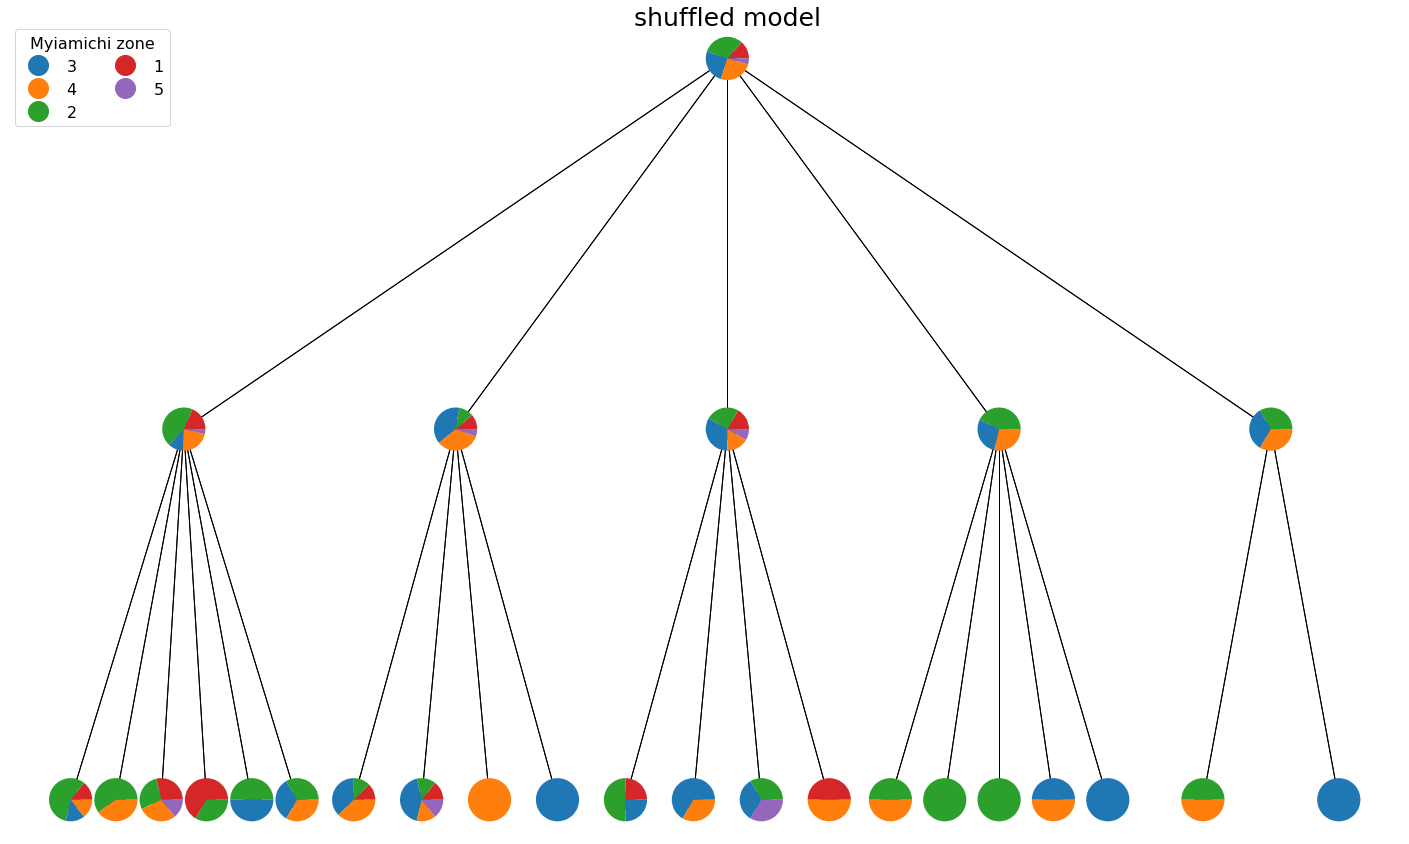

In [186]:
pos = hierarchy_pos(hierarchy, root=f"l{L}_1")
#pos = nx.spring_layout(hierarchy)
fig, ax = plt.subplots(figsize=(25,15))

nx.draw(hierarchy, pos=pos, ax=ax)
nx.draw_networkx_nodes(hierarchy,pos)
nx.draw_networkx_edges(hierarchy, pos=pos, ax=ax)
#nx.draw_networkx_labels(hierarchy, pos=pos, ax=ax, font_size=25)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.05
p2=piesize/2.0
for n in hierarchy:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    fracs, colors = get_fracs(n)
    a.pie(fracs, colors=colors)
    
legend_elements = [Line2D([0], [0], 
                          marker='o', 
                          ms = 20,
                          lw = 0,
                          color=network_lut[label], 
                          label=label,
                          markerfacecolor=network_lut[label],
                          markersize=15) for label in labels]

leg = ax.legend(handles=legend_elements, fontsize=16, ncol=2, loc='upper left')
plt.title("shuffled model", fontsize = 25)
leg.set_title("Myiamichi zone",prop={'size':16})

plt.show()
fig.savefig("hsbm_NewDataset/DV_ORsvg_and_markers/fitted/treeplot_myiamichi_shuffled.png")
#fig.savefig("hsbm_DV_svg/Olfr_03_05/cluster_network_onlymarkers.pdf")



In [123]:
labels = ["zone 1","zone 2","zone 3","zone 4","zone 5",]

## V-measure score

In [63]:
scores = {"hSBM":[],"shuffle":[],"LDA":[]}

In [79]:
layers = 3
for l in range(layers + 1):
    df_hier = pd.read_csv("hsbm_NewDataset/3D_ORs/raw_counts/topsbm_level_%i_clusters.csv" %(l))
    #df_hier = pd.read_csv("hsbm_NewDataset/DV_ORsvg_and_markers/fitted/topsbm_level_%i_clusters.csv" %(l))
    
    genes = {}
    for i in range(len(df_hier.columns)):
        for gene in df_hier.iloc[:,i][~pd.isnull(df_hier.iloc[:,i])]:
            #print(gene)
            genes[gene] = i
    gene = pd.DataFrame.from_dict(genes, orient = "index")
    #gene.index = random.sample(list(gene.index),len(gene.index))
    index_zone = []
    markers = []

    for item in gene.index:
        if item in mombaert_zone.index: 
        #for i in range(len(zones.columns)):
         #   if len(np.where(zones.iloc[:,i] == item)[0]) != 0:
            #print(item)
          #      index_zone.append(i)
                markers.append(item)
    #print(index_zone ,gene.loc[markers,:].values )
    mombaert_zone_test = mombaert_zone.loc[markers,:].values.reshape(len(markers),)
    
    gene = gene.loc[markers,:]
    print(len(np.unique(gene.values)))
    lda = pd.read_csv("hsbm_NewDataset/LDA/Countclust_logcounts/compare_hsbm/P_topics_gene.csv",index_col = [0])
    clustering = sklearn.cluster.AgglomerativeClustering(len(np.unique(gene.values))).fit_predict(lda)
    lda_pred = pd.DataFrame(clustering).set_index(lda.index)
    score = metrics.v_measure_score(mombaert_zone_test, lda_pred.loc[markers,:].values.reshape(len(markers),))
    h = metrics.homogeneity_score(mombaert_zone_test, lda_pred.loc[markers,:].values.reshape(len(markers),))
    c = metrics.completeness_score(mombaert_zone_test, lda_pred.loc[markers,:].values.reshape(len(markers),))
    print(h,c,score)
    #scores["LDA"].append(score)

35
0.8190339748815503 0.5512792449036497 0.6589974097949841
19
0.6967444611938899 0.5340508986389431 0.6046447976093141
9
0.6302661222298062 0.5982310627983769 0.6138309094109953
5
0.5307566013473279 0.6878816740598267 0.5991896805163494


In [82]:
mombaert_zone_test

array([5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 2, 4, 7, 4, 7, 4, 0, 3, 3, 3, 3, 3,
       3, 3, 5, 0, 3, 3, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 4, 2, 2, 0, 1, 1,
       6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6], dtype=int64)

In [31]:
gene

,0
Olfr272,1
Olfr49,1
Olfr457,1
Olfr155,1
Olfr156,1
Olfr157,1
Olfr273,1
Olfr267,1
Olfr1104,2
Olfr821,2


In [6]:
def add_score_lines(ax, scores, labels=None, h=False, c=False, alpha=0.8, **kwargs):
    '''
    add to ax lines in scores
    add homogeneity and completness if required by h and c
    '''
    colors = {
        'primary_site': 'blue',
        'hSBM': 'blue',
        'secondary_site': 'red',
        'status': 'red',
        'hSBM': 'blue',
        'mixed': 'green',
        'hierhsbm': 'purple',
        'hsbm->hierachical': 'purple',
        'disease_type': 'red',
        'shuffle': 'orange',
        'tm': 'darkcyan',
        'cc': 'darkred',
        'disease_tissue': 'purple',
        'hierarchical': 'darkgreen',
        'LDA': 'violet',
        'RPPA Clusters': 'red',
        'wgcna': 'purple'
    }

    for label in labels:
        if label not in scores.keys():
            print("No score for %s"%label)
            continue
        if label not in colors.keys():
            colors[label]='darkblue'
        xl = scores[label]['xl']
        if h:
            ax.plot(xl, scores[label]['h'], ls='-.', c=colors[label], marker='x', lw=0.5, ms=25, alpha=alpha,
                    label='homogeneity - %s' % label)
        if c:
            ax.plot(xl, scores[label]['c'], ls=':', c=colors[label], marker='<', lw=0.5, ms=25, alpha=alpha,
                    label='completness - %s' % label)
        if len(scores[label]['V']) == len(xl):
            ax.plot(xl, scores[label]['V'], label='%s' % label, ls='-', c=colors[label], marker='o', lw=0.5, ms=25,
                    **kwargs)
        else:
            raise(ValueError("xl has got wrong lenght"))
    customize_metric_plot(ax, xl)


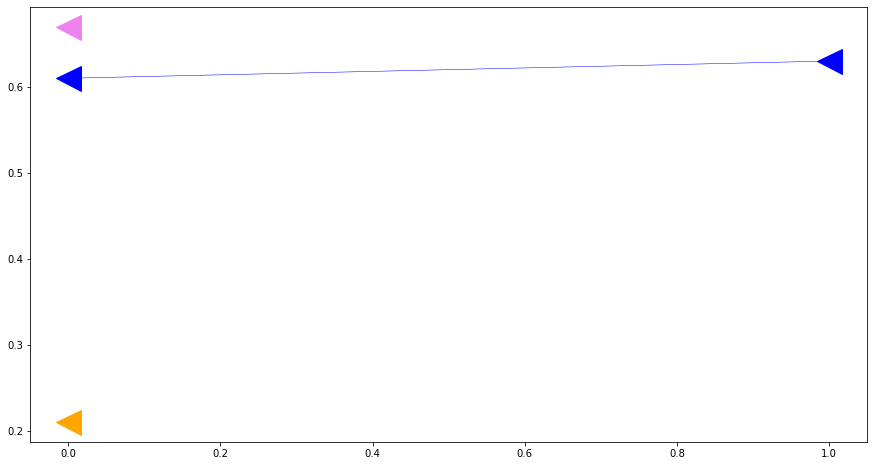

In [17]:
colors = {
        'primary_site': 'blue',
        'hSBM': 'blue',
        'secondary_site': 'red',
        'status': 'red',
        'hSBM': 'blue',
        'mixed': 'green',
        'hierhsbm': 'purple',
        'hsbm->hierachical': 'purple',
        'disease_type': 'red',
        'shuffle': 'orange',
        'tm': 'darkcyan',
        'cc': 'darkred',
        'disease_tissue': 'purple',
        'hierarchical': 'darkgreen',
        'LDA': 'violet',
        'RPPA Clusters': 'red',
        'wgcna': 'purple'
    }

scores = {}
scores["hSBM"] = [0.61,0.63]
scores["LDA"] = [0.67]
scores["shuffle"] = [0.21]

fig=plt.figure(figsize=(15,8))
ax = fig.subplots(1)
for label in scores.keys():
    ax.plot(scores[label], label='%s' %label, ls='-', c=colors[label], marker='<', lw=0.5, ms=25)